<a href="https://colab.research.google.com/github/mohamed-faisal6/Python-Assignment/blob/master/Linear_Regression_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

In [36]:
df= pd.read_csv('company.csv')
df.head(100)

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
...,...,...,...,...,...
95,Infosys,NaN,5835.0,Chennai,India
96,TCS,NaN,7084.0,Mumbai,India
97,Infosys,22.0,8943.0,Calcutta,India
98,TCS,33.0,8345.0,Delhi,India


In [37]:
#check rec count
df.shape

(149, 5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.9+ KB


In [39]:
df.describe(include='all')

,Company,Age,Salary,Place,Country
count,140,130.000000,124.000000,134,148
unique,6,NaN,NaN,11,1
top,TCS,NaN,NaN,Mumbai,India
freq,53,NaN,NaN,37,148
mean,NaN,30.484615,5312.467742,NaN,NaN
std,NaN,11.096640,2573.764683,NaN,NaN
min,NaN,0.000000,1089.000000,NaN,NaN
25%,NaN,22.000000,3030.000000,NaN,NaN
50%,NaN,32.500000,5000.000000,NaN,NaN
75%,NaN,37.750000,8000.000000,NaN,NaN


In [40]:
df.duplicated().sum()

8

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.shape

(141, 5)

In [43]:
df[["Company","Place","Country"]].apply(lambda x: print(x.unique()))

['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
['India' nan]


Company    None
Place      None
Country    None
dtype: object

In [44]:
df["Company"].replace({'Tata Consultancy Services':'TCS','Congnizant':'CTS','Infosys Pvt Lmt':'Infosys'},inplace=True)

In [45]:
df[["Company","Place","Country"]].apply(lambda x: print(x.unique()))

['TCS' 'Infosys' 'CTS' nan]
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
['India' nan]


Company    None
Place      None
Country    None
dtype: object

In [46]:
df.isna().sum()

Company     9
Age        18
Salary     24
Place      15
Country     1
dtype: int64

In [47]:
df[df['Salary'].isna()]

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
10,CTS,23.0,NaN,Mumbai,India
12,CTS,45.0,NaN,Chennai,India
18,TCS,22.0,NaN,Chennai,India
19,Infosys,32.0,NaN,Mumbai,India
36,TCS,32.0,NaN,Noida,India
37,NaN,35.0,NaN,Hyderabad,India
46,CTS,24.0,NaN,Calcutta,India
48,CTS,43.0,NaN,Mumbai,India


In [48]:
#Drop all Records with no Salary & no company
df.dropna(subset=["Salary"], inplace = True)
df.dropna(subset=["Company"], inplace = True)

In [49]:
df.isna().sum()

Company     0
Age        15
Salary      0
Place      12
Country     0
dtype: int64

In [50]:
#Replace record with no place info as Global employee
df['Place'].fillna("Global",inplace=True)

In [51]:
import matplotlib
%matplotlib inline

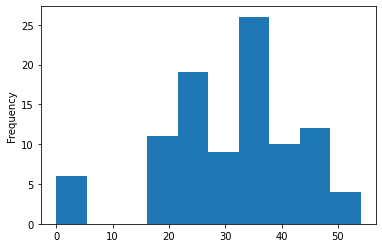

In [52]:
df["Age"].plot(kind = "hist")

In [53]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [54]:
df.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
dtype: int64

In [77]:
#Convert non numeric datatype to category for training the model
df['Company_Code']= df['Company'].astype('category').cat.codes+1
df['Place_Code']= df['Place'].astype('category').cat.codes+1
df['Country_Code']= df['Country'].astype('category').cat.codes+1

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 143
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       112 non-null    object 
 1   Age           112 non-null    float64
 2   Salary        112 non-null    float64
 3   Place         112 non-null    object 
 4   Country       112 non-null    object 
 5   Company_Code  112 non-null    int8   
 6   Place_Code    112 non-null    int8   
 7   Country_Code  112 non-null    int8   
dtypes: float64(2), int8(3), object(3)
memory usage: 5.6+ KB


In [103]:
df_new = df[["Company_Code","Country_Code","Place_Code","Age","Salary"]]

In [104]:
df_new

,Company_Code,Country_Code,Place_Code,Age,Salary
2,3,1,2,35.0,2300.0
3,2,1,5,40.0,3000.0
4,3,1,8,23.0,4000.0
5,2,1,2,33.0,5000.0
6,3,1,3,33.0,6000.0
...,...,...,...,...,...
139,1,1,10,22.0,2934.0
140,2,1,7,44.0,4034.0
141,3,1,2,33.0,5034.0
142,2,1,8,22.0,8202.0


In [105]:
X = df_new.drop(columns=["Salary"])
y = df_new["Salary"]

In [106]:
X

,Company_Code,Country_Code,Place_Code,Age
2,3,1,2,35.0
3,2,1,5,40.0
4,3,1,8,23.0
5,2,1,2,33.0
6,3,1,3,33.0
...,...,...,...,...
139,1,1,10,22.0
140,2,1,7,44.0
141,3,1,2,33.0
142,2,1,8,22.0


In [107]:
y

2      2300.0
3      3000.0
4      4000.0
5      5000.0
6      6000.0
        ...  
139    2934.0
140    4034.0
141    5034.0
142    8202.0
143    9024.0
Name: Salary, Length: 112, dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [109]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [110]:
model = LinearRegression()

model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
print(model.intercept_)
print(model.coef_)

1774.5707102338183
[867.73374241   0.          60.92513945  35.85051495]


In [112]:
pred_train = model.predict(train_X)
pred_test = model.predict(test_X)

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Train - MSE",mean_squared_error(train_y, pred_train))

print("Test - MSE",mean_squared_error(test_y, pred_test))

print("Train - MAE",mean_absolute_error(train_y, pred_train))

print("Test - MAE",mean_absolute_error(test_y, pred_test))

print("Train - R2 Score",r2_score(train_y, pred_train))

print("Test - R2 Score",r2_score(test_y, pred_test))

Train - MSE 5933880.102151624
Test - MSE 7482350.074317925
Train - MAE 2082.83761223908
Test - MAE 2294.743398734536
Train - R2 Score 0.10418259670855501
Test - R2 Score -0.1476668886121113
